In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.1'

In [3]:
torchvision.__version__

'0.15.2'

In [4]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(), target_transform=None)

In [5]:
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
label

9

In [9]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [10]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image squeezed shape: torch.Size([28, 28])


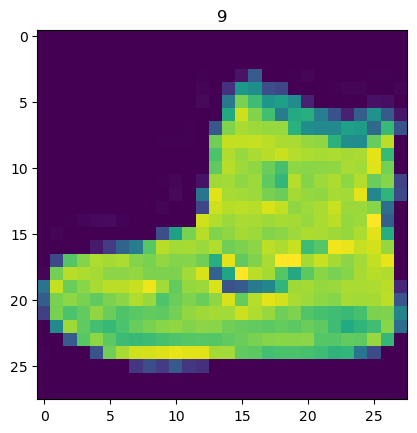

In [11]:
image, label = train_data[0]
print(f'image squeezed shape: {image.squeeze().shape}')
plt.imshow(image.squeeze())
plt.title(label);

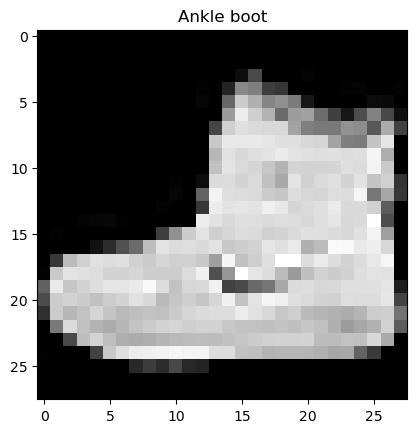

In [12]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

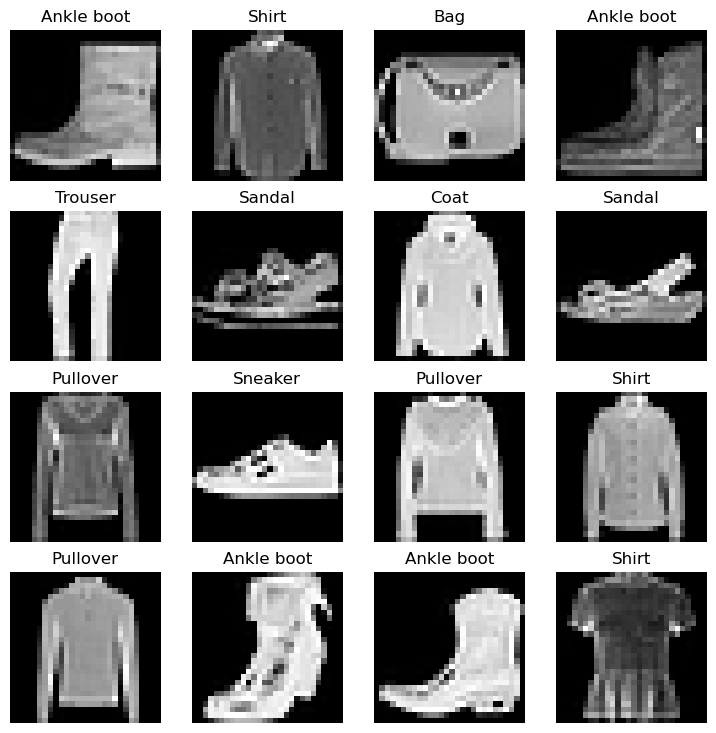

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [14]:
from torch.utils.data import DataLoader

In [15]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [16]:
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f698e35ab00>, <torch.utils.data.dataloader.DataLoader object at 0x7f698e35a6e0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [17]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Each dataloader contains n batches and each batch is a package of 32 images with corresponding labels.

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


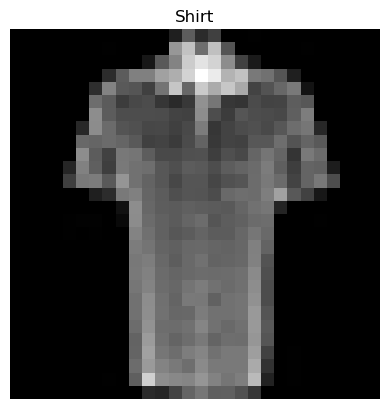

In [18]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

In [19]:
flatten_model = nn.Flatten()
x = train_features_batch[0]

In [20]:
x.shape

torch.Size([1, 28, 28])

In [21]:
output = flatten_model(x)

In [22]:
output.shape

torch.Size([1, 784])

In [23]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=input_shape, out_features=hidden_units),
                                        nn.Linear(in_features=hidden_units, out_features=output_shape)
                                        )
    def forward(self, x):
        return self.layer_stack(x)

In [24]:
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names))
model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
from torchmetrics import Accuracy

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [27]:
from timeit import default_timer as timer

In [28]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [29]:
for batch, (X, y) in enumerate(train_dataloader):
    print(batch)
    print(X.shape)
    print(y.shape)
    y_predict = model_0(X)
    print(f'shape of y_pred: {y_predict.shape}')
    

0
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
2
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
3
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
4
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
5
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
6
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
7
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
8
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
9
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
10
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
11
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred:

125
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
126
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
127
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
128
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
129
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
130
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
131
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
132
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
133
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
134
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
135
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
136
torch.Size([32, 1, 28, 28])
torch.Size(

226
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
227
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
228
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
229
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
230
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
231
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
232
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
233
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
234
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
235
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
236
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
237
torch.Size([32, 1, 28, 28])
torch.Size(

362
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
363
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
364
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
365
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
366
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
367
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
368
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
369
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
370
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
371
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
372
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
373
torch.Size([32, 1, 28, 28])
torch.Size(

489
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
490
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
491
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
492
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
493
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
494
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
495
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
496
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
497
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
498
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
499
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
500
torch.Size([32, 1, 28, 28])
torch.Size(

589
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
590
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
591
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
592
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
593
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
594
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
595
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
596
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
597
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
598
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
599
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
600
torch.Size([32, 1, 28, 28])
torch.Size(

733
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
734
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
735
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
736
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
737
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
738
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
739
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
740
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
741
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
742
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
743
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
744
torch.Size([32, 1, 28, 28])
torch.Size(

828
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
829
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
830
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
831
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
832
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
833
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
834
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
835
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
836
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
837
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
838
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
839
torch.Size([32, 1, 28, 28])
torch.Size(

956
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
957
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
958
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
959
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
960
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
961
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
962
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
963
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
964
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
965
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
966
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
967
torch.Size([32, 1, 28, 28])
torch.Size(

1054
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1055
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1056
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1057
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1058
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1059
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1060
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1061
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1062
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1063
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1064
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1065
torch.Size([32, 1, 28, 28])

1196
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1197
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1198
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1199
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1200
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1201
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1202
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1203
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1204
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1205
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1206
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1207
torch.Size([32, 1, 28, 28])

1317
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1318
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1319
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1320
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1321
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1322
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1323
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1324
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1325
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1326
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1327
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1328
torch.Size([32, 1, 28, 28])

1419
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1420
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1421
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1422
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1423
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1424
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1425
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1426
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1427
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1428
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1429
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1430
torch.Size([32, 1, 28, 28])

1561
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1562
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1563
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1564
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1565
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1566
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1567
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1568
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1569
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1570
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1571
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1572
torch.Size([32, 1, 28, 28])

1684
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1685
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1686
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1687
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1688
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1689
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1690
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1691
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1692
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1693
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1694
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1695
torch.Size([32, 1, 28, 28])

1783
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1784
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1785
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1786
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1787
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1788
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1789
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1790
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1791
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1792
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1793
torch.Size([32, 1, 28, 28])
torch.Size([32])
shape of y_pred: torch.Size([32, 10])
1794
torch.Size([32, 1, 28, 28])

Enumerate in python returns index, object inside the enumerator

In [30]:
acc_fn = Accuracy(task='multiclass', num_classes=len(class_names))

In [31]:
from tqdm.auto import tqdm

In [32]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------')
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # passing all the 32 samples in a batch at once
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += acc_fn(y, test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59484 | Test loss: 0.51635, Test acc: 0.82%

Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47946 | Test loss: 0.48138, Test acc: 0.83%

Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45703 | Test loss: 0.47773, Test acc: 0.83%

Train time on cpu: 15.538 seconds


In [33]:
# comparing models

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc.item()}

In [34]:
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=acc_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777321219444275,
 'model_acc': 0.8349640369415283}

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [36]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=input_shape, out_features=hidden_units),
                                        nn.ReLU(),
                                        nn.Linear(in_features=hidden_units, out_features=output_shape),
                                        nn.ReLU()
                                        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [37]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

In [38]:
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [39]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [40]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [41]:
acc_fn = Accuracy(task='multiclass', num_classes=len(class_names)).to(device)

In [42]:
torch.manual_seed(42)
from timeit import default_timer as timer
start_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------')
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=acc_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=acc_fn
    )
end_gpu = timer()
total = print_train_time(start_gpu, end_gpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 1.09199 | Train accuracy: 0.61%
Test loss: 0.95636 | Test accuracy: 0.65%

Epoch: 1
------
Train loss: 0.78101 | Train accuracy: 0.72%
Test loss: 0.72227 | Test accuracy: 0.74%

Epoch: 2
------
Train loss: 0.67027 | Train accuracy: 0.76%
Test loss: 0.68500 | Test accuracy: 0.75%

Train time on cuda: 20.246 seconds


In [43]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc.item()}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=acc_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 0.7501996755599976}

In [44]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777321219444275,
 'model_acc': 0.8349640369415283}

In [45]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, 
                                             kernel_size=3, stride=1, padding=1),
                                   nn.ReLU(),
                                   nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                            kernel_size=3, stride=1, padding=1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2, stride=2)
                                   )
        self.block_2 = nn.Sequential(nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
                                    nn.ReLU(),
                                    nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2)
                                   )
        self.classifier = nn.Sequential(nn.Flatten(),
                                       nn.Linear(in_features=hidden_units*7*7, out_features=output_shape))
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        return self.classifier(x)

In [46]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [47]:
torch.manual_seed(42)
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]
test_image.shape

torch.Size([3, 64, 64])

In [48]:
test_image

tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [49]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [50]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [51]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [52]:
conv_layer_2.weight.shape

torch.Size([10, 3, 5, 5])

In [53]:
conv_layer_2.bias.shape

torch.Size([10])

In [54]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_layer(conv_layer(test_image)).shape

torch.Size([10, 31, 31])

In [55]:
random_tensor = torch.rand(size=(1, 1, 2, 2))
max_pool_layer = nn.MaxPool2d(kernel_size=2)
print(f'random tensor shape: {random_tensor.shape}')
print(f'output shape: {max_pool_layer(random_tensor).shape}')

random tensor shape: torch.Size([1, 1, 2, 2])
output shape: torch.Size([1, 1, 1, 1])


The shape of tensor: [batch_size    color_channels    height    width]

In [56]:
random_tensor

tensor([[[[0.2502, 0.3799],
          [0.3647, 0.1742]]]])

In [57]:
max_pool_layer(random_tensor)

tensor([[[[0.3799]]]])

In [58]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [59]:
torch.manual_seed(42)
start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n---------')
    train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, 
              accuracy_fn=acc_fn, device=device)
    test_step(data_loader=test_dataloader, model=model_2, loss_fn=loss_fn, accuracy_fn=acc_fn, device=device)
end_time = timer()
total = print_train_time(start_time, end_time, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.60406 | Train accuracy: 0.78%
Test loss: 0.38612 | Test accuracy: 0.86%

Epoch: 1
---------
Train loss: 0.35709 | Train accuracy: 0.87%
Test loss: 0.34752 | Test accuracy: 0.88%

Epoch: 2
---------
Train loss: 0.31656 | Train accuracy: 0.89%
Test loss: 0.32421 | Test accuracy: 0.88%

Train time on cuda: 23.104 seconds


In [60]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=acc_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32421040534973145,
 'model_acc': 0.8819888234138489}

In [61]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477732,0.834964
1,FashionMNISTModelV1,0.685001,0.750200
2,FashionMNISTModelV2,0.324210,0.881989


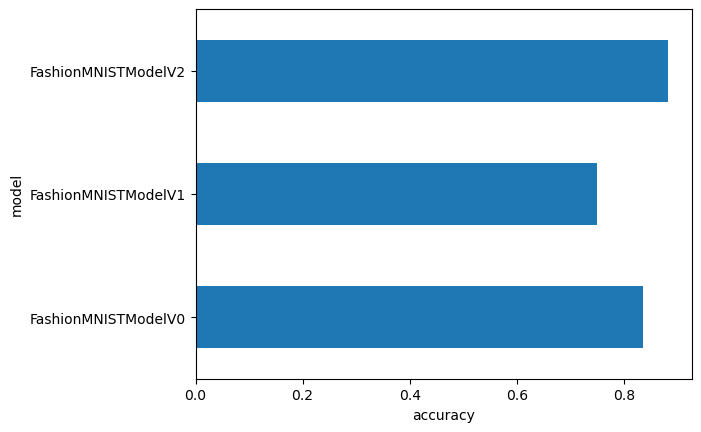

In [62]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model");

In [63]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [64]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [65]:
pred_probs = make_predictions(model=model_2, data=test_samples)

In [66]:
pred_probs.shape

torch.Size([9, 10])

In [67]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [68]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

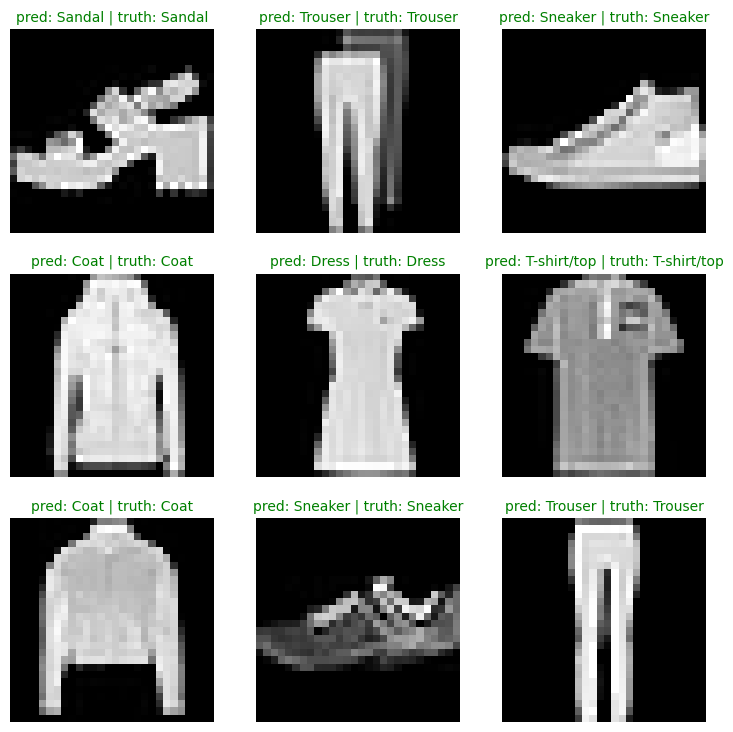

In [69]:
plt.figure(figsize=(9, 9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f'pred: {pred_label} | truth: {truth_label}'
    
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False);

In [91]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions'):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [93]:
y_pred_tensor.device

device(type='cpu')

In [94]:
import mlxtend
print(mlxtend.__version__)

0.22.0


In [95]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [96]:
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))

In [97]:
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

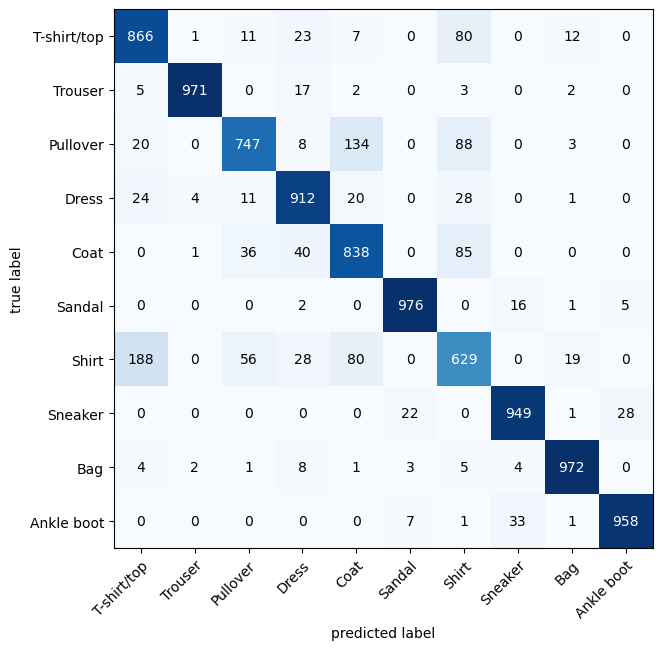

In [98]:
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               class_names=class_names,
                               figsize=(10, 7));

In [99]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = 'tiny_vgg.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

In [100]:
loaded_model = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model = loaded_model.to(device)

In [102]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=acc_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32421040534973145,
 'model_acc': 0.8819888234138489}

In [103]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32421040534973145,
 'model_acc': 0.8819888234138489}